In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import *
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
import pandas as pd
from RegressionUtils import *

In [2]:
## Get the dataset as numpy array

data_ext = pd.read_csv('data/CDMSData_extended.csv', sep=',')
data_red = pd.read_csv('data/CDMS_Dataset.csv', sep=',')

xna_data = DataProcessor(data_ext, data_type = 'extended', preprocess = True, skip_amp = True)

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test, x_mean, x_std, y_norm = xna_data.get_data(split_type='labels', labels = [-12.502,-29.5,-41.9])

In [4]:
lr = CDMS_LR(X_train, X_val, X_test, 
             y_train, y_val, y_test, 
             x_mean, x_std, y_norm,
             mode="LR")
MSE_train_lr, MSE_val_lr, MSE_test_lr, coeffs_lr = lr.do_LR(do_plot=False)

In [5]:
lasso = CDMS_LR(X_train, X_val, X_test, 
             y_train, y_val, y_test, 
             x_mean, x_std, y_norm,
             mode="Lasso", alpha=1.e-4)
MSE_train_lasso, MSE_val_lasso, MSE_test_lasso, coeffs_lasso = lasso.do_LR(do_plot=False)

In [6]:
pca = CDMS_PCA(X_train, X_val, X_test, 
               y_train, y_val, y_test, 
               x_mean, x_std, y_norm,
               mode="LR", alpha=1.e-5, n_components = 0.999)
MSE_train_PCA, MSE_val_PCA, MSE_test_PCA, coeffs_PCA = pca.do_LR(do_plot=False)

In [7]:
bias_lr, weights_lr = coeffs_lr[0:1], coeffs_lr[1:]
bias_lasso, weights_lasso = coeffs_lasso[0:1], coeffs_lasso[1:]

In [8]:
bias_pca, weights_pca = coeffs_PCA[0:1], coeffs_PCA[1:]
weights_pca_original = np.matmul(coeffs_PCA[1:].reshape(1,38), pca.get_components())

In [9]:
weights_pca_original = weights_pca_original.reshape(-1)

In [10]:
print(MSE_train_lr, MSE_val_lr, MSE_test_lr)
print(MSE_train_lasso, MSE_val_lasso, MSE_test_lasso)
print(MSE_train_PCA, MSE_val_PCA, MSE_test_PCA)

1.1713337618485689 1.119867811444937 1.2540989669003066
1.217440314879446 1.1399919666639986 1.3554762317633515
1.260846915080585 1.1934682980472975 1.403129208653966


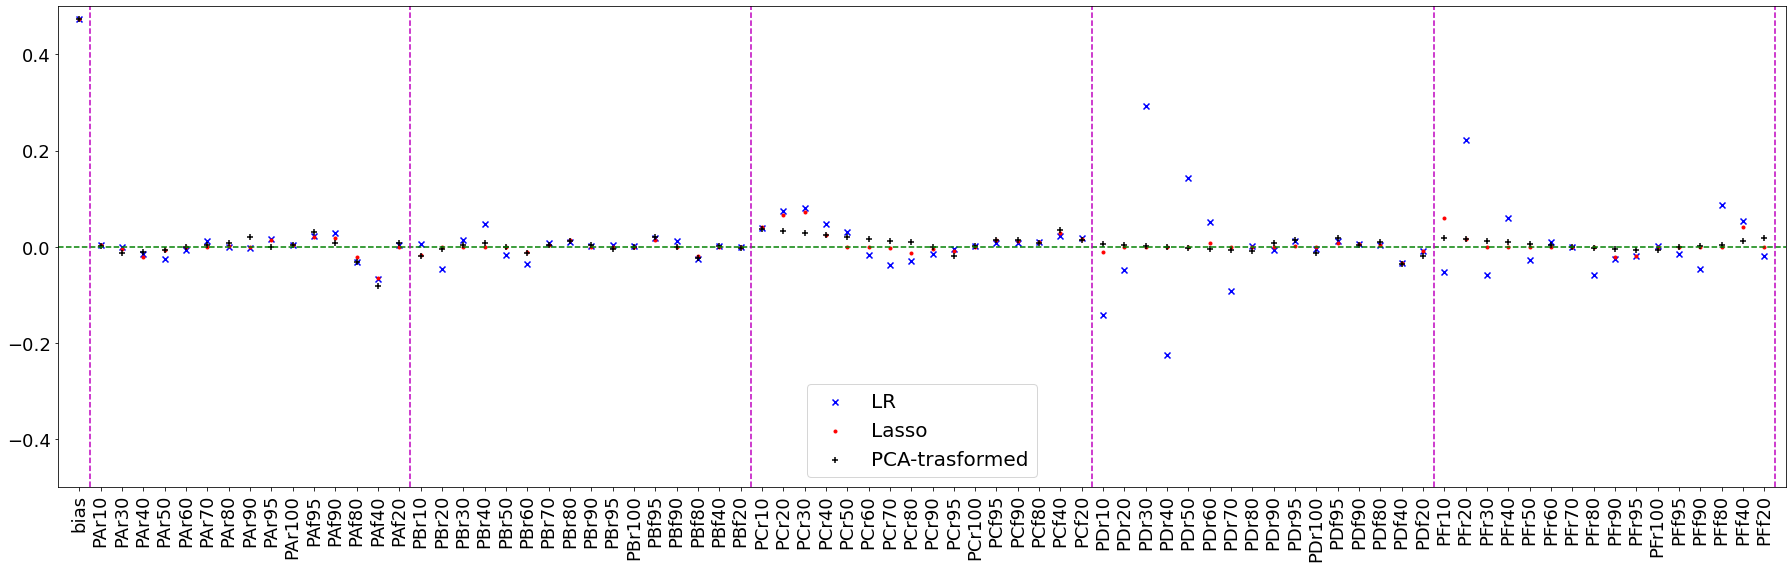

In [11]:
X = np.arange(0,80)
plt.figure(figsize=(25,8))
plt.scatter(X, coeffs_lr, color='b', marker='x', label='LR')
plt.scatter(X, coeffs_lasso, color='r', marker='.', label='Lasso')
plt.scatter(X, np.concatenate((bias_pca, weights_pca_original)), color='k', marker='+', label='PCA-trasformed')
plt.xticks(X,['bias'] + xna_data.features, fontsize = 18,rotation=90)
plt.yticks(fontsize = 18)
plt.xlim(-1,80)
plt.ylim(-0.5,0.5)
plt.axhline(y=0, color='g', linestyle='--')
plt.axvline(x=0.5, color='m', linestyle='--')
plt.axvline(x=15.5, color='m', linestyle='--')
plt.axvline(x=31.5, color='m', linestyle='--')
plt.axvline(x=47.5, color='m', linestyle='--')
plt.axvline(x=63.5, color='m', linestyle='--')
plt.axvline(x=79.5, color='m', linestyle='--')
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Plots/LinRegPlots/CoefComp.png")
plt.show()

import json
data_dict = {
    'coeffs_lr' : list(coeffs_lr),
    'coeffs_lasso': list(coeffs_lasso),
    'coefs_pca': list(np.concatenate((bias_pca, weights_pca_original))),
    'tags': list(['bias'] + xna_data.features)
}
_f_ = open("Plots/LinRegPlots/CoefComp.png.DATA.json", "w")
json.dump(data_dict, _f_)
_f_.close()


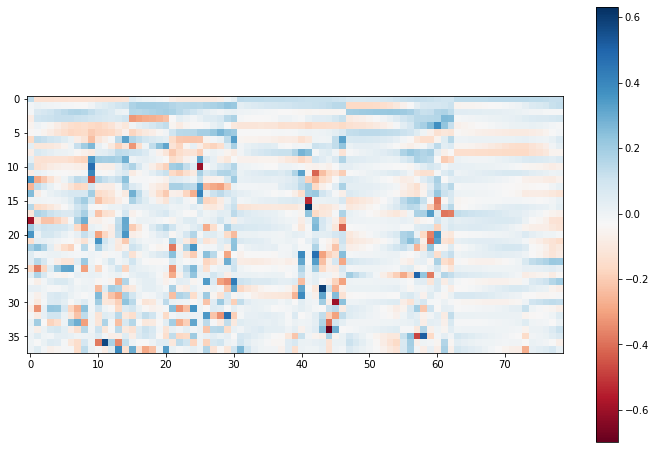

In [161]:
comps = pca.get_components()
plt.figure(figsize=(12,8))
plt.imshow(comps, cmap='RdBu')
plt.colorbar()

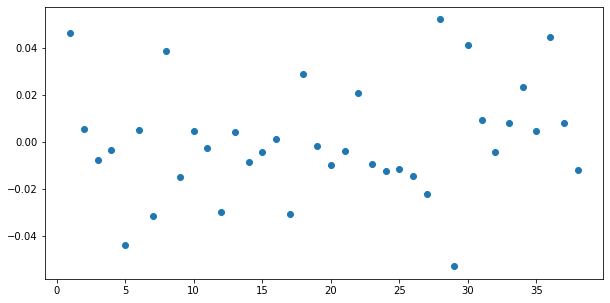

In [162]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1,39),weights_pca)

In [163]:
X_train_trans = pca.pca.transform(X_train)
X_val_trans = pca.pca.transform(X_val)
X_test_trans = pca.pca.transform(X_test)

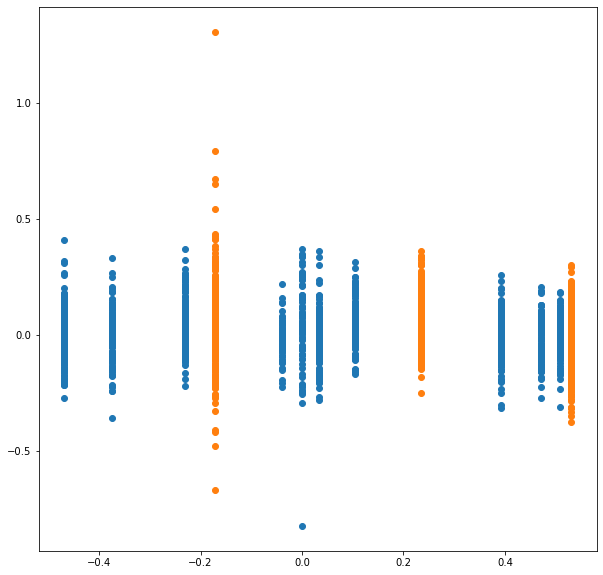

In [164]:
plt.figure(figsize=(10,10))
plt.scatter(y_val - bias_pca, X_val_trans[:,-10])
plt.scatter(y_test - bias_pca, X_test_trans[:,-10])

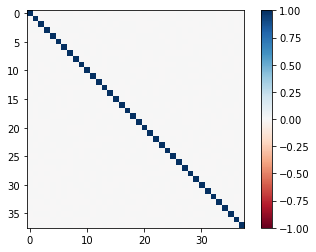

In [165]:
plt.imshow(np.corrcoef(X_train_trans, rowvar=False), cmap="RdBu", vmin = -1, vmax = 1)
plt.colorbar()

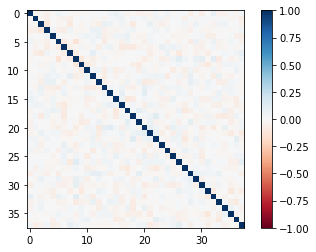

In [166]:
plt.imshow(np.corrcoef(X_val_trans, rowvar=False), cmap="RdBu", vmin = -1, vmax = 1)
plt.colorbar()

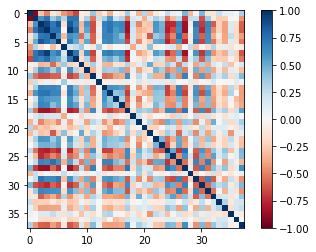

In [167]:
plt.imshow(np.corrcoef(X_test_trans, rowvar=False), cmap="RdBu", vmin = -1, vmax = 1)
plt.colorbar()

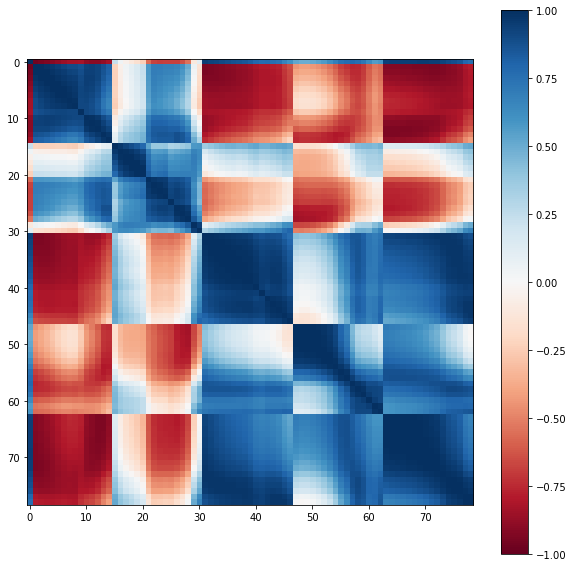

In [168]:
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(X_train, rowvar=False), cmap="RdBu", vmin = -1, vmax = 1)
plt.colorbar()

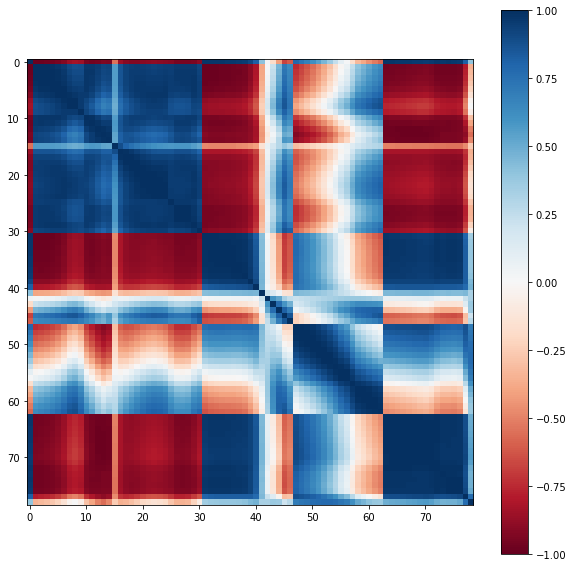

In [169]:
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(X_test, rowvar=False), cmap="RdBu", vmin = -1, vmax = 1)
plt.colorbar()

In [170]:
np.save("Coeffs_LR.npy", coeffs_lr)
np.save("Coeffs_Lasso.npy", coeffs_lasso)

In [171]:
xna_data.features[42]

'PCf95'